## Imports

In [1]:
import os, sys, random
import pickle
sys.path.append('..')
sys.path.append('../data/generated_features/')
from dataset_creation import *
from sklearn.neural_network import MLPRegressor

## Data Import 

In [2]:
# Feature creation done in file named 'feature_creation.py'
X = pd.read_pickle('../data/generated_features/X_1.pickle')
y = pd.read_pickle('../data/generated_features/y_1.pickle')

file_folder = '../data/champs-scalar-coupling' if 'champs-scalar-coupling' in os.listdir('../data/') else '../data'
os.listdir(file_folder)

train = pd.read_csv(f'{file_folder}/train.csv')
test = pd.read_csv(f'{file_folder}/test.csv')
sub = pd.read_csv(f'{file_folder}/sample_submission.csv')
structures = pd.read_csv(f'{file_folder}/structures.csv')
contributions = pd.read_csv((f'{file_folder}/scalar_coupling_contributions.csv'))

## Feature Selection

In [3]:
X.drop(['graph_holes_1', 'graph_holes_0'], axis='columns', inplace=True)
X.columns

Index(['type', 'atom_0', 'x_0', 'y_0', 'z_0', 'atom_1', 'x_1', 'y_1', 'z_1',
       'dist', 'dist_x', 'dist_y', 'dist_z', 'type_0', 'type_1',
       'dist_to_type_mean', 'dist_to_type_0_mean', 'dist_to_type_1_mean',
       'molecule_type_dist_mean', 'num_tda_1', 'time_tda_0', 'time_tda_1',
       'amp_tda', 'graph_lifetime_1', 'graph_amplitude_1'],
      dtype='object')

## Model 1

In [4]:
params = {'num_leaves': 128,
          'min_child_samples': 79,
          'objective': 'reg:squarederror',
          'max_depth': 13,
          'learning_rate': 0.1,
          "subsample_freq": 1,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": 1,
          'reg_alpha': 0.1,
          'reg_lambda': 0.3,
          'colsample_bytree': 1.0
         }

model = XGBRegressor(**params)
# model = RandomForestRegressor()
#model = MLPRegressor(max_iter=300)




n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=873)

results = []

y_split = []

for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(group_mean_log_mae(y_pred, y_valid, X_valid['type']))
    results.append(group_mean_log_mae(y_pred, y_valid, X_valid['type']))
    y_split.append(y_valid)
    
print(np.mean(results), np.std(results))

/Users/colinkalin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.35374798154172415
0.3847089619816249
0.4367424097888234
0.41062668721198736
0.3372724901584732
0.38461970613652663 0.036298676305397626


## Model 2

In [5]:
def get_number_of_atoms(g):
    return len(g)
molecule_selection = train.groupby(by='molecule_name').apply(get_number_of_atoms).nlargest(100)

In [6]:
# Import 
train_dist = pd.read_csv('/Users/colinkalin/Desktop/train_dist.csv')

In [37]:
X = train_dist[train_dist['molecule_name'].isin(molecule_selection.index)].reset_index()
y = X['scalar_coupling_constant']
molecules = X['molecule_name'].values
X.drop(['id', 'molecule_name', 'scalar_coupling_constant'], axis='columns', inplace=True)


lenc = LabelEncoder()
lenc.fit(X['atom_1'])
X['atom_0'] = lenc.transform(X['atom_0'])
X['atom_1'] = lenc.transform(X['atom_1'])

X.drop('index', axis='columns', inplace=True)

# TDA features here
with open('num_rel_holes_0_dict.pickle', 'rb') as f:
    num_rel_holes_0_dict = pickle.load(f)
with open('num_rel_holes_1_dict.pickle', 'rb') as f:
    num_rel_holes_1_dict = pickle.load(f)
with open('num_rel_holes_2_dict.pickle', 'rb') as f:
    num_rel_holes_2_dict = pickle.load(f)
with open('num_holes_0_dict.pickle', 'rb') as f:
    num_holes_0_dict = pickle.load(f)
with open('num_holes_1_dict.pickle', 'rb') as f:
    num_holes_1_dict = pickle.load(f)
with open('num_holes_2_dict.pickle', 'rb') as f:
    num_holes_2_dict = pickle.load(f)
with open('avg_lifetime_0_dict.pickle', 'rb') as f:
    avg_lifetime_0_dict = pickle.load(f)    
with open('avg_lifetime_1_dict.pickle', 'rb') as f:
    avg_lifetime_1_dict = pickle.load(f)  
with open('avg_lifetime_2_dict.pickle', 'rb') as f:
    avg_lifetime_2_dict = pickle.load(f)  
with open('amplitude_dict.pickle', 'rb') as f:
    amplitude_dict = pickle.load(f)
    
num_rel_holes_0 = [num_rel_holes_0_dict[m] for m in molecules]
num_rel_holes_1 = [num_rel_holes_1_dict[m] for m in molecules]
num_rel_holes_2 = [num_rel_holes_2_dict[m] for m in molecules]
num_holes_0 = [num_holes_0_dict[m] for m in molecules]
num_holes_1 = [num_holes_1_dict[m] for m in molecules]
num_holes_2 = [num_holes_2_dict[m] for m in molecules]
avg_lifetime_0 = [avg_lifetime_0_dict[m] for m in molecules]
avg_lifetime_1 = [avg_lifetime_1_dict[m] for m in molecules]
avg_lifetime_2 = [avg_lifetime_2_dict[m] for m in molecules]
amplitude = [amplitude_dict[m] for m in molecules]

# TDA features here
with open('../data/generated_features/num_rel_holes_0_graph_dict.pickle', 'rb') as f:
    num_rel_holes_0_graph_dict = pickle.load(f)
with open('../data/generated_features/num_rel_holes_1_graph_dict.pickle', 'rb') as f:
    num_rel_holes_1_graph_dict = pickle.load(f)
with open('../data/generated_features/num_rel_holes_2_graph_dict.pickle', 'rb') as f:
    num_rel_holes_2_graph_dict = pickle.load(f)
with open('../data/generated_features/num_holes_0_graph_dict.pickle', 'rb') as f:
    num_holes_0_graph_dict = pickle.load(f)
with open('../data/generated_features/num_holes_1_graph_dict.pickle', 'rb') as f:
    num_holes_1_graph_dict = pickle.load(f)
with open('../data/generated_features/num_holes_2_graph_dict.pickle', 'rb') as f:
    num_holes_2_graph_dict = pickle.load(f)
with open('../data/generated_features/avg_lifetime_0_graph_dict.pickle', 'rb') as f:
    avg_lifetime_0_graph_dict = pickle.load(f)    
with open('../data/generated_features/avg_lifetime_1_graph_dict.pickle', 'rb') as f:
    avg_lifetime_1_graph_dict = pickle.load(f)  
with open('../data/generated_features/avg_lifetime_2_graph_dict.pickle', 'rb') as f:
    avg_lifetime_2_graph_dict = pickle.load(f)  
with open('../data/generated_features/amplitude_graph_dict.pickle', 'rb') as f:
    amplitude_graph_dict = pickle.load(f)
with open('../data/generated_features/area_feature_0_dict.pickle', 'rb') as f:
    area_feature_0_dict = pickle.load(f)
with open('../data/generated_features/area_feature_1_dict.pickle', 'rb') as f:
    area_feature_1_dict = pickle.load(f)
with open('../data/generated_features/area_feature_2_dict.pickle', 'rb') as f:
    area_feature_2_dict = pickle.load(f)
    
num_rel_holes_0_graph = [num_rel_holes_0_graph_dict[m] for m in molecules]
num_rel_holes_1_graph = [num_rel_holes_1_graph_dict[m] for m in molecules]
num_rel_holes_2_graph = [num_rel_holes_2_graph_dict[m] for m in molecules]
num_holes_0_graph = [num_holes_0_graph_dict[m] for m in molecules]
num_holes_1_graph = [num_holes_1_graph_dict[m] for m in molecules]
num_holes_2_graph = [num_holes_2_graph_dict[m] for m in molecules]
avg_lifetime_0_graph = [avg_lifetime_0_graph_dict[m] for m in molecules]
avg_lifetime_1_graph = [avg_lifetime_1_graph_dict[m] for m in molecules]
avg_lifetime_2_graph = [avg_lifetime_2_graph_dict[m] for m in molecules]
amplitude_graph = [amplitude_graph_dict[m] for m in molecules]
area_feature_0 = [area_feature_0_dict[m] for m in molecules]
area_feature_1 = [area_feature_1_dict[m] for m in molecules]
area_feature_2 = [area_feature_2_dict[m] for m in molecules]

X['num_rel_holes_0'] = num_rel_holes_0
X['num_rel_holes_1'] = num_rel_holes_1
X['num_rel_holes_2'] = num_rel_holes_2
X['num_holes_0'] = num_holes_0
X['num_holes_1'] = num_holes_1
X['num_holes_2'] = num_holes_2
X['avg_lifetime_0'] = avg_lifetime_0
X['avg_lifetime_1'] = avg_lifetime_1
X['avg_lifetime_2'] = avg_lifetime_2
X['amplitude'] = amplitude

X['num_rel_holes_0_graph'] = num_rel_holes_0_graph
X['num_rel_holes_1_graph'] = num_rel_holes_1_graph
X['num_rel_holes_2_graph'] = num_rel_holes_2_graph
X['num_holes_0_graph'] = num_holes_0_graph
X['num_holes_1_graph'] = num_holes_1_graph
X['num_holes_2_graph'] = num_holes_2_graph
X['avg_lifetime_0_graph'] = avg_lifetime_0_graph
X['avg_lifetime_1_graph'] = avg_lifetime_1_graph
X['avg_lifetime_2_graph'] = avg_lifetime_2_graph
X['amplitude_graph'] = amplitude_graph

X['area_feature_0'] = area_feature_0
X['area_feature_1'] = area_feature_0
X['area_feature_2'] = area_feature_0

non_TDA_features = ['atom_index_0', 'atom_index_1', 'type', 'type_0', 'type_1', 'atom_0',
'x_0', 'y_0', 'z_0', 'atom_1', 'x_1', 'y_1', 'z_1', 
 'dist', 'dist_x', 'dist_y', 'dist_z', 'dist_to_type_mean', 'dist_to_type_0_mean', 'dist_to_type_1_mean', 
 'molecule_dist_mean_x', 'molecule_dist_std_x','molecule_dist_skew_x', 'molecule_dist_kurt_x', 
 'molecule_dist_mean_y', 'molecule_dist_std_y', 'molecule_dist_skew_y', 'molecule_dist_kurt_y',
 'meanx', 'meany', 'meanz', 'dist_0tomean', 'dist_1tomean', 'meanxH', 'meanyH', 'meanzH', 
 'dist_0tomeanH', 'dist_1tomeanH', 'meanxC','meanyC', 'meanzC', 
 'dist_0tomeanC', 'dist_1tomeanC', 'meanxN',
 'meanyN', 'meanzN', 'dist_0tomeanN', 'dist_1tomeanN', 
 'meanxO', 'meanyO', 'meanzO', 'dist_0tomeanO', 'dist_1tomeanO', 
 'meanxF', 'meanyF', 'meanzF', 'dist_0tomeanF', 'dist_1tomeanF', 
 'atom_count', 'atom_0l', 'x_0l', 'y_0l', 'z_0l', 'atom_0r', 'x_0r', 'y_0r', 'z_0r',
 'dist_0l', 'dist_0r', 'atom_1l', 'x_1l', 'y_1l', 'z_1l', 'atom_1r',
 'x_1r', 'y_1r', 'z_1r', 'dist_1l', 'dist_1r']

non_TDA_features_small = ['atom_index_0', 'atom_index_1', 'type', 'type_0', 'type_1', 'atom_0',
'x_0', 'y_0', 'z_0', 'atom_1', 'x_1', 'y_1', 'z_1', 
 'dist', 'dist_x', 'dist_y', 'dist_z', 'dist_to_type_mean', 'dist_to_type_0_mean', 'dist_to_type_1_mean', 
 'molecule_dist_mean_x', 'molecule_dist_std_x','molecule_dist_skew_x', 'molecule_dist_kurt_x', 
 'molecule_dist_mean_y', 'molecule_dist_std_y', 'molecule_dist_skew_y', 'molecule_dist_kurt_y',
 'meanx', 'meany', 'meanz', 'dist_0tomean', 'dist_1tomean', 'meanxH', 'meanyH', 'meanzH', 
 'dist_0tomeanH', 'dist_1tomeanH', 'meanxC','meanyC', 'meanzC', 
 'dist_0tomeanC', 'dist_1tomeanC', 'meanxN',
 'meanyN', 'meanzN']

tda_features = ['num_rel_holes_0', 'num_rel_holes_1', 'num_rel_holes_2', 'num_holes_0', 'num_holes_1', 
                'num_holes_2', 'avg_lifetime_0', 'avg_lifetime_1', 'avg_lifetime_2', 'amplitude', 
                'num_rel_holes_0_graph', 'num_rel_holes_1_graph', 'num_rel_holes_2_graph', 'num_holes_0_graph',
                'num_holes_1_graph', 'num_holes_2_graph', 'avg_lifetime_0_graph', 'avg_lifetime_1_graph', 
                'avg_lifetime_2_graph', 'amplitude_graph', 'area_feature_0', 'area_feature_1', 'area_feature_2']

X = X[non_TDA_features]

In [ ]:
X_tda = pd.DataFrame(np.array([num_rel_holes_0_graph, num_rel_holes_1_graph, num_rel_holes_2_graph, 
 num_holes_0_graph, num_holes_1_graph, num_holes_2_graph, 
 avg_lifetime_0_graph, avg_lifetime_1_graph, avg_lifetime_2_graph,
 amplitude_graph, X['type']])).T
X_tda.rename({10: 'type'}, axis='columns', inplace=True)

In [38]:
params = {'num_leaves': 128,
          'min_child_samples': 79,
          'objective': 'reg:squarederror',
          'max_depth': 13,
          'learning_rate': 0.1,
          "subsample_freq": 1,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": 1,
          'reg_alpha': 0.1,
          'reg_lambda': 0.3,
          'colsample_bytree': 1.0
         }


model = XGBRegressor(**params)

n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=43)

results = []
diff = []

for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    diff_fold = y_pred - y_valid
    diff.append(diff_fold)
    print(group_mean_log_mae(y_pred, y_valid, X_valid['type']))
    results.append(group_mean_log_mae(y_pred, y_valid, X_valid['type']))
    
print(np.mean(results), np.std(results))

/Users/colinkalin/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


-0.8227039877117939
-0.8731179430381525
-0.834635523688331
-0.7536559896267269
-0.7535808998791302
-0.807538868788827 0.047073669059775614


In [27]:
-0.807538868788827 - 0.047073669059775614, -0.8267077512602322 +  0.030812851198205572

(-0.8546125378486026, -0.7958949000620267)

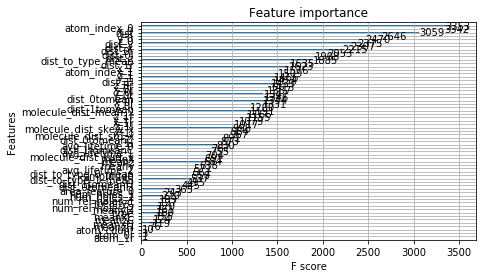

In [20]:
plot_importance(model)